# Deep Neural Network

## Preliminary Steps

In [55]:
import torch
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn import datasets

## Generating Synthesized Data

In [35]:
n_samples = 500
X, y = datasets.make_circles(n_samples, noise=0.1, factor=0.4, random_state=1)
x_data = torch.Tensor(X)
y_data = torch.Tensor(y).view(n_samples, 1)

df = pd.DataFrame()
df['x1'] = X[:, 0]
df['x2'] = X[:, 1]
df['class'] = y.astype('str')

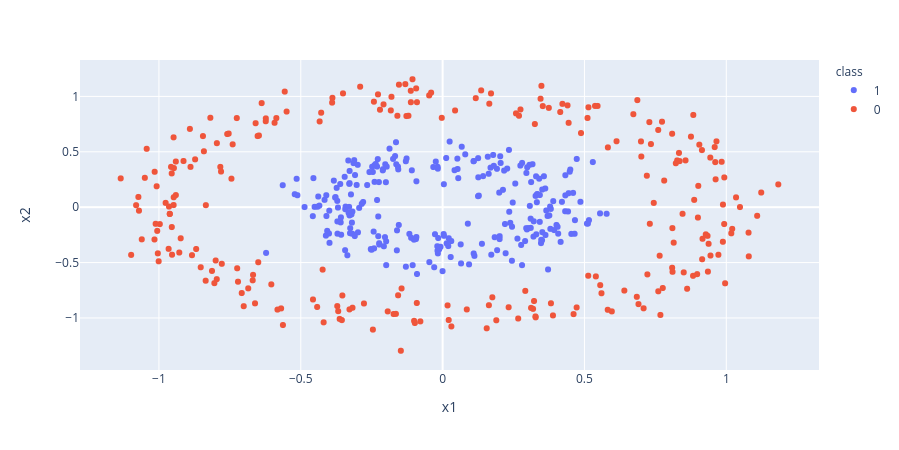

In [36]:
px.scatter(data_frame=df, x='x1', y='x2', color='class')

## Building Model

In [37]:
class Model(torch.nn.Module):
    def __init__(self, input_features, hidden_layer_neurons, output_features):
        super().__init__()
        self.linear_1 = torch.nn.Linear(input_features, hidden_layer_neurons)
        self.linear_2 = torch.nn.Linear(hidden_layer_neurons, output_features)
        
    def forward(self, x):
        pred_1 = torch.sigmoid(self.linear_1(x))
        pred_2 = torch.sigmoid(self.linear_2(pred_1))
        
        return pred_2
    
    def predict(self, x):
        return 0 if self.forward(x) < 0.5 else 1

In [47]:
torch.manual_seed(1)
model = Model(2, 4, 1)

## Training Model

In [48]:
criterion = torch.nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

In [49]:
epochs = 1000
losses = []

for i in range(1, epochs+1):
    y_pred = model.forward(x_data)
    loss = criterion(y_pred, y_data)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    losses.append(loss.item())

## Plot Loss Function

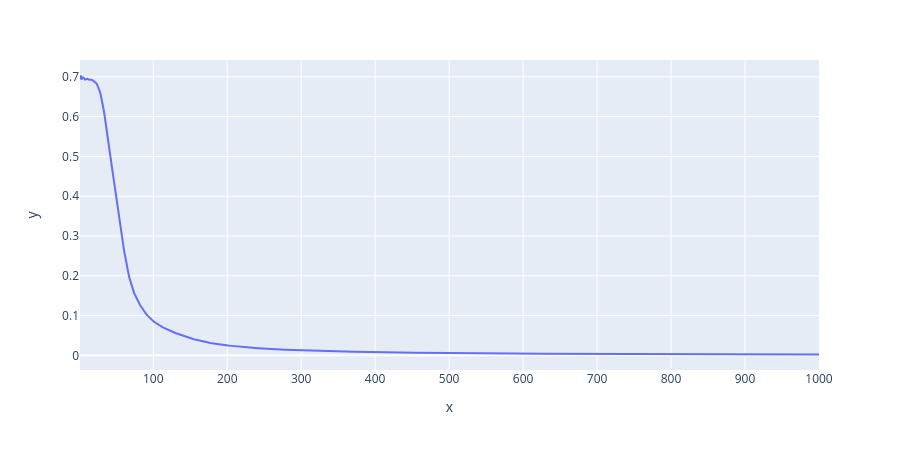

In [50]:
px.line(x=range(1, epochs+1), y=losses)

## Plot Trained Model

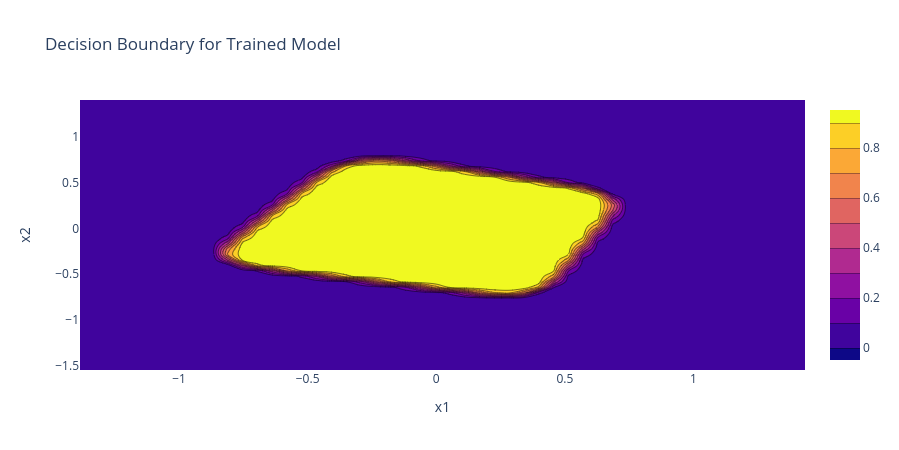

In [84]:
padding = 0.25
x_span = np.linspace(x_data[:, 0].min() - padding, x_data[:, 0].max() + padding)
y_span = np.linspace(x_data[:, 1].min() - padding, x_data[:, 1].max() + padding)

xx, yy = np.meshgrid(x_span, y_span)
grid = torch.Tensor(np.c_[xx.ravel(), yy.ravel()])

z = model.forward(grid).view(xx.shape).detach().numpy()
fig = go.Figure(go.Contour(x=x_span, y=y_span, z=z))
fig.update_layout(title='Decision Boundary for Trained Model', xaxis_title='x1', yaxis_title='x2')
fig.show()

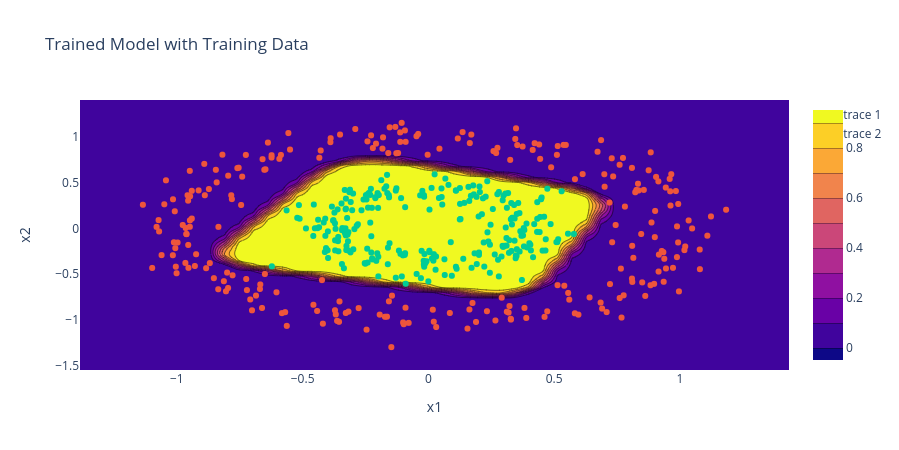

In [83]:
fig = go.Figure(go.Contour(x=x_span, y=y_span, z=z))
fig.add_scatter(x=df[df['class'] == '0']['x1'], y=df[df['class'] == '0']['x2'], mode='markers')
fig.add_scatter(x=df[df['class'] == '1']['x1'], y=df[df['class'] == '1']['x2'], mode='markers')
fig.update_layout(title='Trained Model with Training Data', xaxis_title='x1', yaxis_title='x2')
fig.show()